<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/ML_%EB%B6%84%EB%A5%982_%EB%AA%A8%EB%8D%B8_0725.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류모델

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

# 붗꽃 데이터 세트를 로딩
iris = load_iris()
iris.keys()
# iris.data는 iris 데이터 세트에 피처(feature)만으로 된 데이터를 numpy로 가지고 있음.
iris_data = iris.data

# iris.target은 붗꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target 값 : ', iris_label)
print('iris target 명 : ', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 :  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.data_module

'sklearn.datasets.data'

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

## 결정 트리

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등.
   지니 지수는 얼마나 불확실한가(얼마나 섞여있는가?)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미

### 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 하이퍼 파라미터 : 학습 프로세스가 시작되기 전에 설정되는 매개변수로서 의사결정 트리가 구축되는 방식에 영향을 주어 구조와 성능에 영향을 준다.
 - criterion: 분할 품질을 측정하는 데 사용되는 기능.
    - gini: 지니 불순도.
    - entropy: 정보 이득.
 - splitter: 각 노드에서 분할하는 데 사용되는 전략.
    - best: 가장 좋은 분할을 선택.
    - random: 무작위로 선택된 분할 중 하나를 선택.
 - 최대 깊이(max_depth):
    - 설명: 트리의 최대 깊이. 이는 뿌리와 잎 사이의 최대 길이.
    - 영향: 트리가 깊어지면 더 복잡한 패턴을 포착할 수 있지만 과적합이 발생할 수 있다. 더 얕은 나무는 적합하지 않을 수 있다.
 - 최소 샘플 분할(min_samples_split):
    - 설명: 분할을 고려하기 위해 노드에 있어야 하는 최소 샘플 수를 정의.
    - 영향: 값이 높을수록 모델이 매우 특정한 패턴(과적합)을 학습하는 것을 방지하는 반면, 값이 낮을수록 데이터에서 노이즈가 포착될 수 있다.
 - 최소 샘플 리프(min_samples_leaf):
    - 설명: 분할 후 리프 노드에 있어야 하는 최소 샘플 수를 설정.
    - 영향: min_samples_split과 유사하게 과적합을 제어. 값이 높을수록 샘플이 거의 없는 리프 노드가 생성되지 않는다.
 - 최대 기능(max_features):
    - 설명: 노드 분할을 위해 고려되는 최대 기능 수.
    - 영향: 이 수를 줄이면 앙상블 모델에서 트리의 다양성이 증가할 수 있지만 중요한 기능이 제외될 수도 있다.
 - 기준(기준):
    - 설명 : 분할 품질을 측정하는 데 사용되는 기능. 일반적인 기준에는 지니 불순물에 대한 "gini", 분류 트리의 정보 이득에 대한 "엔트로피", 회귀 트리에 대한 "mse"(평균 제곱 오류)가 포함.
    - 영향: 기준 선택은 나무가 자라는 방식에 영향을 미치고 모델 성능에 영향을 미칠 수 있다.
 - 최대 리프 노드(max_leaf_nodes):
    - 설명: 트리의 최대 리프 노드 수.
    - 영향: 트리의 크기와 복잡성을 제어하는 ​​데 사용할 수 있다. 리프 노드가 많을수록 더 복잡한 모델이 가능.

 - max_leaf_nodes: 리프 노드의 최대 수. 이 값을 설정하면 모델이 더욱 단순해지고 과적합이 방지됨.

 - min_impurity_decrease: 분할이 이루어지기 위한 최소 불순도 감소.

 - ccp_alpha: 복잡도 매개변수 α에 대한 비용-복잡도 가지치기.

### 장점과 단점

* 장점:
 - 해석성: 전문가가 아니더라도 쉽게 이해하고 해석할 수 있습니다.
 - 데이터 정규화 필요 없음: 데이터 정규화가 필요하지 않습니다.
 - 비선형 관계 처리: 기능 간의 비선형 관계를 처리할 수 있습니다.
* 단점:
 - 과적합: 잡음이 있는 데이터를 과적합하는 경향이 있습니다.
 - 불안정성: 데이터의 작은 변화로 인해 완전히 다른 트리가 나타날 수 있습니다.
 - 편향된 트리: 지배적인 클래스에 편향되어 있습니다.

https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

지니계수 산출 사례
- 지니계수가 0인 경우 완전한 평등 : 소득 배열: [20, 20, 20, 20, 20]
- 지니계수가 1인 경우 한 명만 100의 소득을 가지고, 나머지는 모두 0의 소득 [0, 0, 0, 0, 100]

$G=1−∑
i=1
n
​
 (L
i
​
 +L
i−1
​
 )(P
i
​
 −P
i−1
​
 )=1−(0+0.2)⋅0.2=1−0.2⋅1=1−0=1$


𝐿
𝑖
L
i
​
 는 누적 소득 비율,
𝑃
𝑖
P
i
​
 는 누적 인구 비율입니다.

인구 비율 (P): [0, 0.2, 0.4, 0.6, 0.8, 1.0]
소득 비율 (L): [0, 0, 0, 0, 0, 1]

In [ ]:
from sklearn.metrics import accuracy_score

# export_graphviz
# DecisionTree Classifier 생성
# dt_clf = DecisionTreeClassifier(random_state=156)
# Pruning(가지치기) : 맨 마지막 leaf노드들이 root노드까지 바로 가는데 걸리는 조건(edge)의 개수인 깊이를 제한
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=5, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=4, random_state=156)

# Load Iris dataset
iris_data = load_iris()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# Train the classifier
dt_clf.fit(X_train, y_train)

# Predict on the test set
pred = dt_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print(f'결정 트리 예측 정확도: {accuracy:.4f}')

결정 트리 예측 정확도: 0.9333


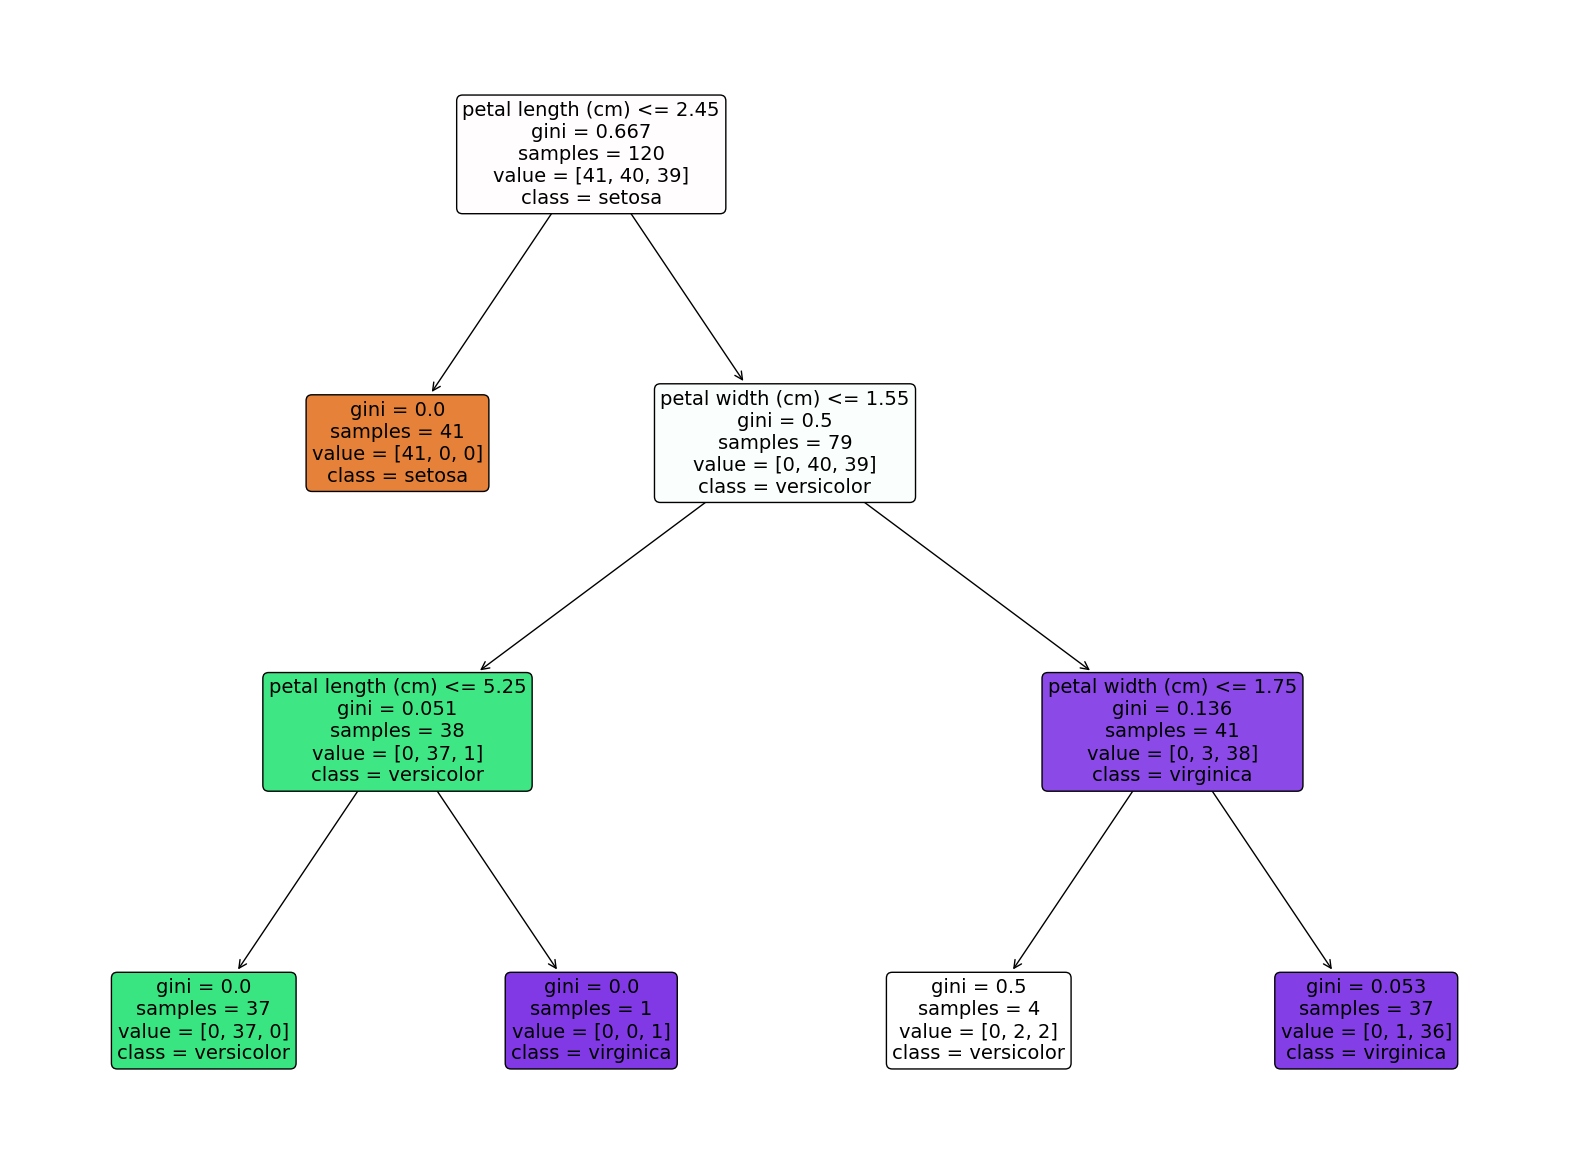

In [ ]:
# DT 시각화
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
tree.plot_tree(dt_clf, filled=True, # filled=True 각 노드를 클래스에 따라 다른 색으로 채움
               feature_names=iris_data.feature_names,
               class_names=iris_data.target_names,
               rounded=True, fontsize=14)
plt.show()
plt.close()

dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156) 조건에서 다음을 찾으시오
- 꽃입 길이가 2.0, 너비가 0.5인 꽃
- 꽃입 길이가 3.0, 너비가 1.2인 꽃
- 꽃입 길이가 5.0, 너비가 2.0인 꽃

Feature importances:
, [0.    0.    0.558 0.442]

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<Axes: >

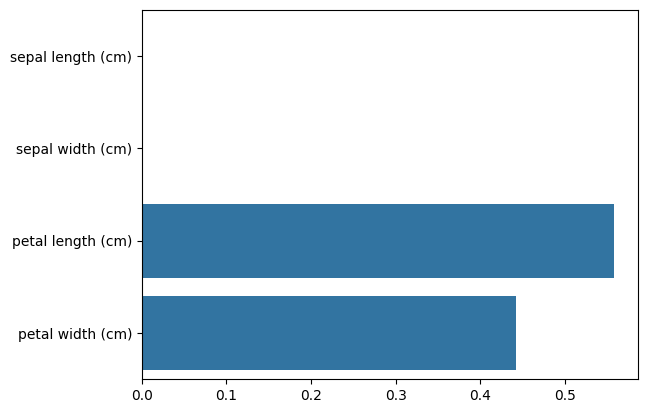

In [ ]:
import seaborn as sns
import numpy as np

# feature importance 추출
print(f'Feature importances:\n, {np.round(dt_clf.feature_importances_, 3)}\n')

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [ ]:
# Confusion matrix를 활용한 정확도 비교
# 가지치기를 한 의사결정나무의 정확도가 가장 떨어지지만, 학습데이터를 분류한 것이라는 사실을 염두해 두어야 함.
# 만약 새로운 데이터가 들어오면 말했듯이 맨 마지막 가지치기의 의사결정나무가 일반화된 특징을 잡을 가능성이 높음
# array[0, 0] = 50: 실제클래스 0이면서 예측된 클레스 0인 경우. (정확한 예측)
# array[1, 2] = 1: 실제클래스 1이지만 예측된 클레스 2인 경우. (잘못된 예측)
# array[2, 1] = 4: 실제클래스 2이지만 예측된 클레스 1인 경우. (잘못된 예측)
from sklearn.metrics import confusion_matrix
confusion_matrix(iris_data.target, dt_clf.predict(iris_data.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  4, 46]])

Q. load_brest_cancer 데이터셋을 불러와서 다음을 수행하세요
- dt로 분류모델 생성 및 모델 정확도 평가(학습:검증 = 8:2)
- 하이퍼 파라미터 분할 기준은 지니계수, 최대깊이는 3으로 설정
- 다양한 하이퍼 파라미터 설정하여 결과 확인
- 결정트리를 시각화

Model Accuracy: 0.9386


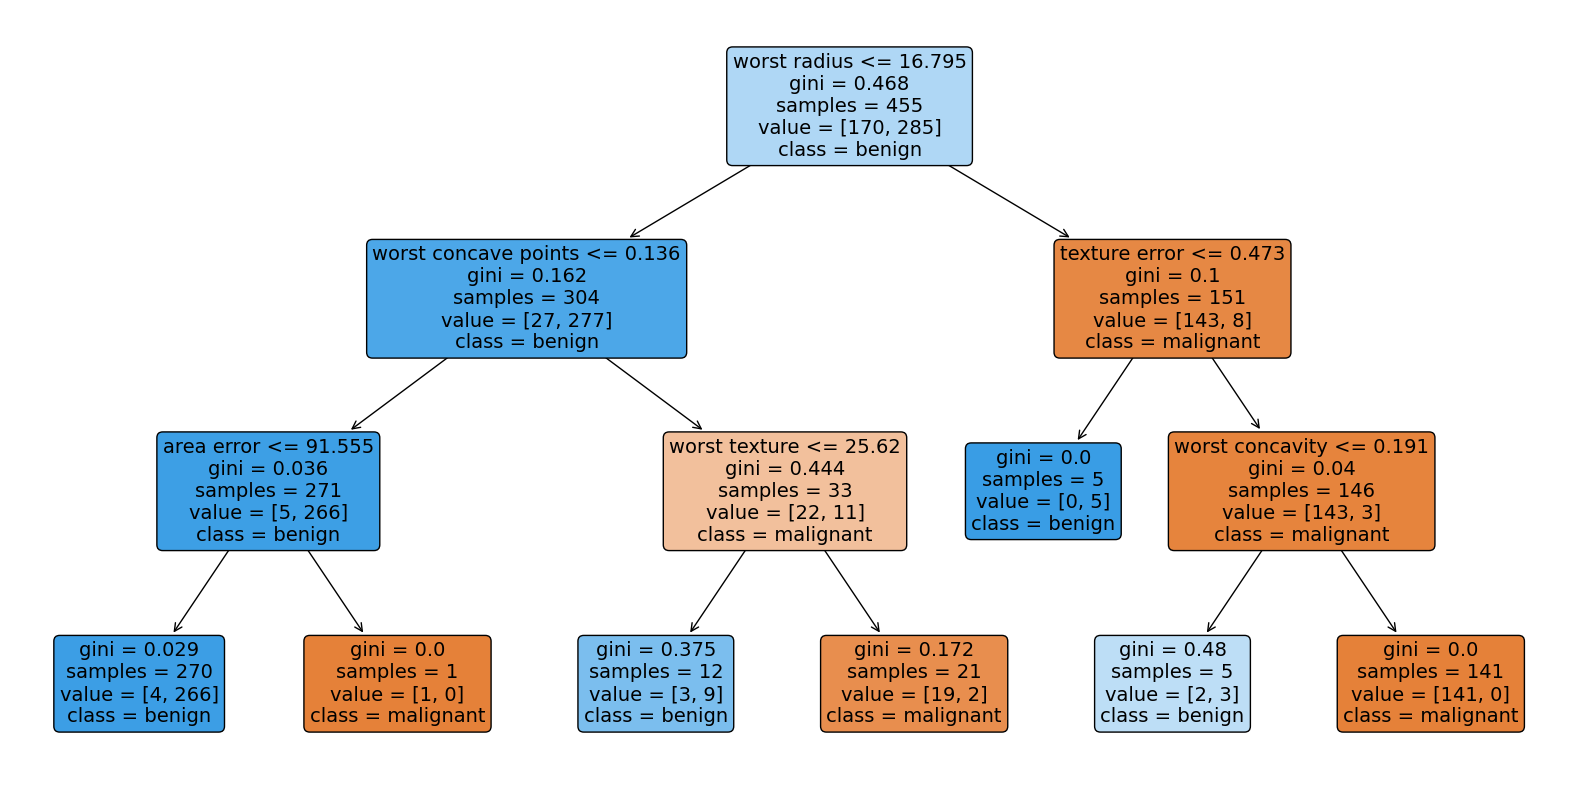

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 데이터셋 로드
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 데이터 분할 (학습:검증 = 8:2)
# stratify는 훈련/테스트 데이터들이 원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록 할 것인지 지정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=cancer.target, random_state=42)

# 기본 결정 트리 모델 생성 (지니계수 기준, 최대 깊이 3)
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
# dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=156)
# dt = DecisionTreeClassifier(criterion='gini', min_samples_split=5, random_state=156)
# dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, random_state=156)
dt.fit(X_train, y_train)

# 모델 예측 및 정확도 평가
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# 결정 트리 시각화
plt.figure(figsize=(20,10))
plot_tree(dt,filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names, rounded=True, fontsize=14)
plt.show()
plt.close()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data.target, dt_clf.predict(data.data))

array([[196,  16],
       [  1, 356]])

정확도: 0.89


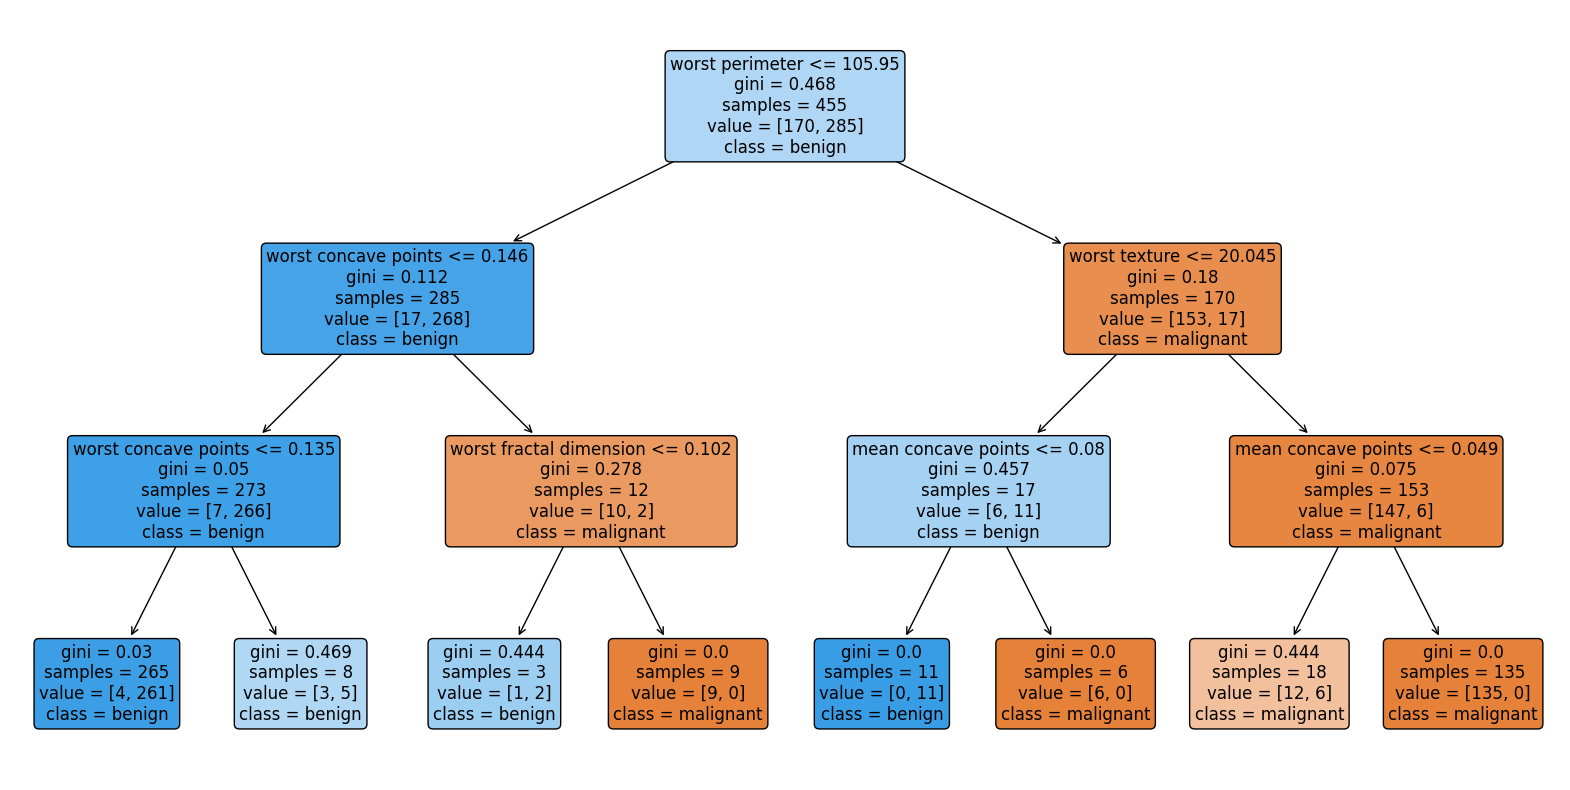

In [ ]:
# 강사님 풀이
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# stratify는 훈련/테스트 데이터들이 원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록 할 것인지 지정
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, \
                                                 stratify=cancer.target, random_state=150)
# dt_tree = DecisionTreeClassifier()
dt_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)

accuracy = accuracy_score(y_test,pred)
# 훈련데이터 예측정확도
print(f'정확도: {round(accuracy,2)}')

# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

dt_tree = DecisionTreeClassifier(max_depth=3)
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=cancer.feature_names,
              class_names=cancer.target_names,
              rounded=True, fontsize=12)
plt.show()
plt.close()

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving knn.png to knn.png


<function matplotlib.pyplot.show(close=None, block=None)>

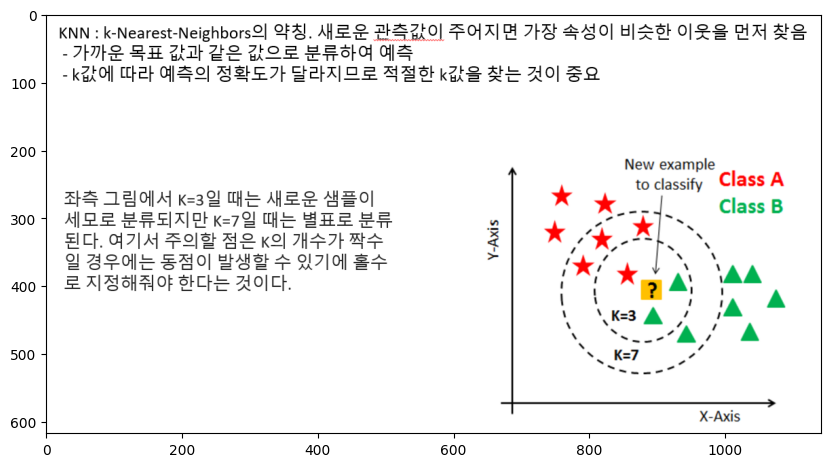

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# img = mpimg.imread('knn.png')

# plt.figure(figsize=(10,6))
# plt.imshow(img)
# plt.show

## KNN

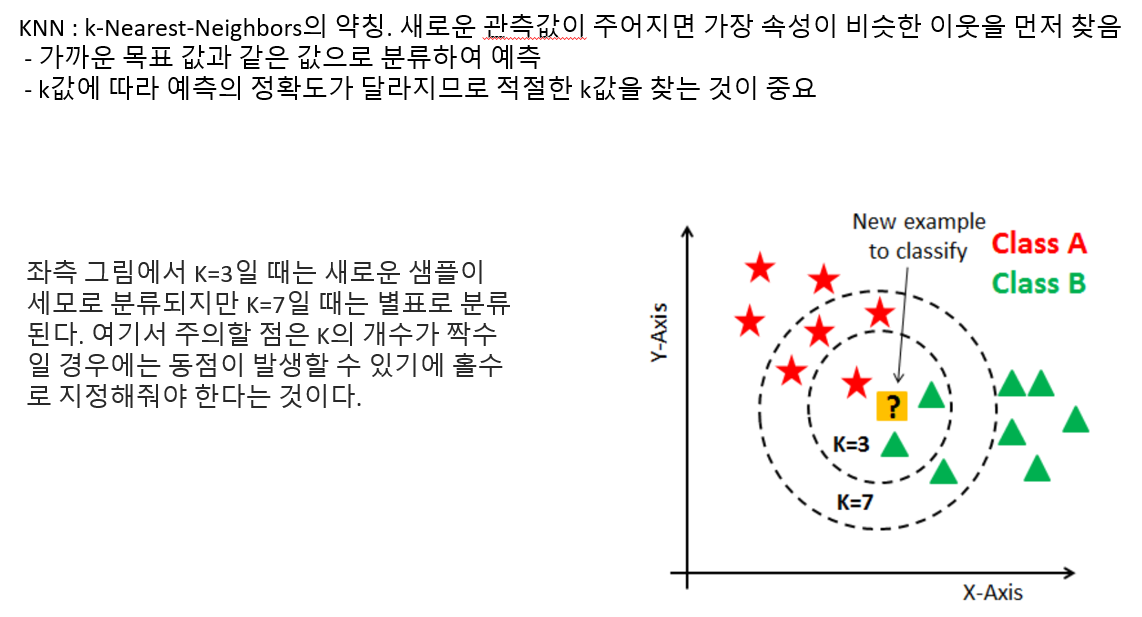

In [ ]:
from google.colab import drive
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/knn.png")

### 장점과 단점
- 장점:
    - 간단하고 직관적입니다.
    - 학습 단계가 없으며, 훈련 데이터의 모든 정보를 활용합니다.
    - 비선형 데이터에 대해 좋은 성능을 발휘할 수 있습니다.
- 단점:
    - 예측 시 계산 비용이 많이 들며, 데이터가 많을수록 느려집니다.
    - 메모리 소모가 큽니다, 모든 훈련 데이터를 저장해야 하므로.
    - 이상치에 민감할 수 있습니다.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로드 및 분할
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# knn 모델 생성
k = 5
knn = KNeighborsClassifier(n_neighbors=k)       # default 5, k 값은 데이터, 과적합 상황, 이상치 등을 감안해서 설정

# 모델 학습
knn.fit(X_train, y_train)

# 모델 예측
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'KNN 예측 정확도: {accuracy:.2f}')

KNN 예측 정확도: 0.97


Q. 사이킷런 datasets에 있는 load_bresast_cancer 데이터에 대하여 KNN(k=3) 알고리즘을 적용하여 분류 분석 모델링 및 평가를 수행하세요

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'KNN 예측 정확도: {accuracy:.2f}')

KNN 예측 정확도: 0.92



## 서포트 벡터 머신(Support Vector Machines, SVM)

- 분류나 회귀, 이상치 탐지 등에 사용되는 강력한 머신러닝 알고리즘 중 하나입니다. SVM은 주로 분류 문제에 사용되며, 이 알고리즘의 핵심 아이디어는 데이터를 고차원 공간으로 변환하여 서로 다른 클래스 간의 최대 마진을 찾는 것입니다.

- SVM은 데이터를 두 개의 클래스로 나누는 결정 경계(결정 초평면이라고도 함)를 찾습니다. 이 결정 경계는 각 클래스의 가장 가까운 훈련 샘플(서포트 벡터라고 함)까지의 거리가 최대가 되는 선을 찾는 것을 목표로 합니다. 이를 '마진 최대화'라고 하며, 이 마진 최대화는 오류를 최소화하고 모델의 일반화 성능을 향상시키는 데 중요한 역할을 합니다.

- SVM은 선형 뿐만 아니라 비선형 분류 문제에도 사용할 수 있습니다. 비선형 문제를 해결하기 위해, SVM은 커널 트릭이라는 기법을 사용하여 데이터를 고차원 공간으로 변환하고, 그 고차원에서 선형 결정 경계를 찾습니다. 이 커널 트릭 덕분에 SVM은 복잡한 분류 문제를 처리할 수 있습니다.

- SVM은 작은 데이터셋에서도 잘 작동하며, 높은 차원의 데이터에 대해 강력한 성능을 발휘합니다. 그러나 데이터셋이 크거나 노이즈가 많은 경우, 그리고 데이터가 선형적으로 구분되지 않는 경우에는 다른 알고리즘(예: 랜덤 포레스트나 신경망)에 비해 성능이 떨어질 수 있습니다.

https://wooono.tistory.com/111

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import io

# # Loadthe images
# img = mpimg.imread("/content/drive/MyDrive/KDT_240424/m5_머신러닝/dataset/svm2.jpg")

# # Plot the image
# plt.figure(figsize=(12,8))
# plt.imshow(img)
# plt.axis('off') # 축 제거
# plt.show()

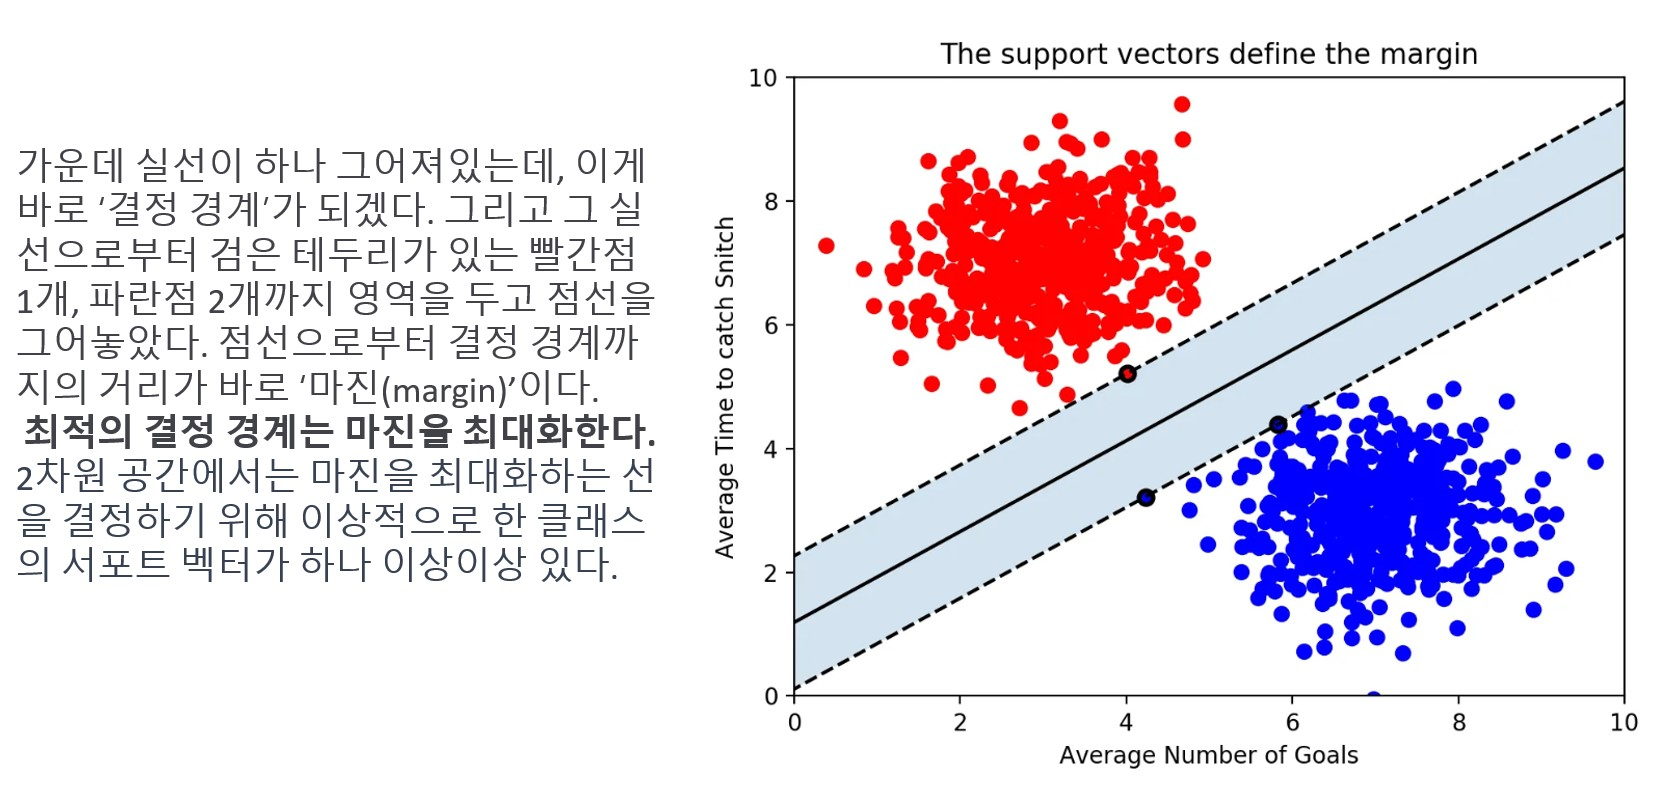

In [ ]:
from IPython.display import Image, display  # 주피터 노트북에 이미지 삽입, 크기조정

img_path = "/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/svm.jpg"
# 이미지 크기 조정 (예: width=300, height=300)
img = Image(img_path, width=1200, height=600)
display(img)

### 장점과 단점
- 장점:
    - 고차원 데이터에 강력한 성능을 보입니다.
    - 마진을 최대화하여 일반화 성능이 우수합니다.
    - 커널 트릭을 통해 비선형 문제를 효과적으로 처리할 수 있습니다.
- 단점:
    - 대규모 데이터셋에서는 계산 비용이 많이 들 수 있습니다.
    - 커널 함수와 하이퍼파라미터 조정이 필요하며, 이로 인해 모델 설정이 복잡할 수 있습니다.

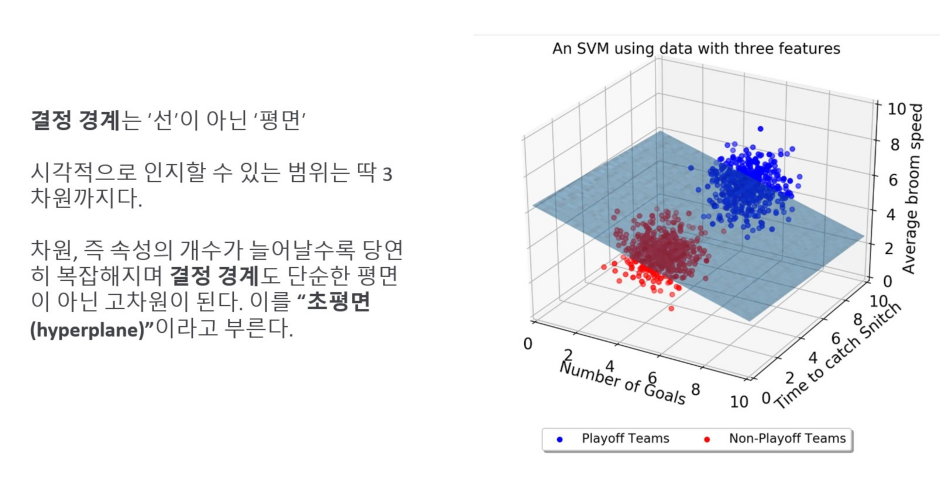

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io

# Loadthe images
img = mpimg.imread("/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/decision boundary.jpg")

# Plot the image
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off') # 축 제거
plt.show()

kernel
- SVM은 데이터를 분류하기 위해 결정 경계(Decision Boundary)라고 하는 분류선을 그리는데 이 때, kernel 매개변수는 이 결정 경계가 어떤 형태를 가질지 결정한다. kernel='linear'는 선형 결정 경계를 사용한다는 의미. 즉, 데이터가 선형적으로 분리될 수 있다고 가정하고, 그에 따른 최적의 직선을 찾는다. 이는 특징들이 선형 관계에 있다고 가정할 때 효과적. 다른 커널 유형으로는 poly(다항식), rbf(방사 기저 함수), sigmoid 등이 있으며, 이들은 비선형적 데이터를 처리하는 데 유용.

C=1.0
- C 매개변수는 SVM 분류기의 정규화 매개변수. 이 값은 모델이 각각의 데이터 포인트들을 얼마나 정확하게 분류할 것인지를 결정.
- C 값이 높으면 모델은 훈련 데이터에 대해 더 정확하게 분류하려고 하며 이는 결정 경계가 개별 데이터 포인트에 더 밀접하게 맞추어져 있는 상태를 의미. 하지만 이는 과적합(Overfitting)의 위험을 증가시킬 수 있다.
- 반대로 C 값이 낮으면 모델은 이러한 개별 데이터 포인트들에 덜 민감하게 된다. 즉, 결정 경계가 더 많은 데이터 포인트를 잘못 분류할 수 있지만, 일반적으로 더 일반화된(Generalized) 모델을 만들 수 있다.
- C=1.0은 기본값으로, 상대적으로 균형 잡힌 정규화 수준을 제공. 이 값은 문제에 따라 조정될 수 있으며, 특정 데이터셋에 대한 모델의 성능을 최적화하는 데 사용.

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1.0, random_state=42)      # kernel='linear'는 선형 커널을 사용한다는 의미. C=1.0은 정규화 매개변수

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# list of Cvalues to try
C_values = [0.01, 0.1, 1, 10, 100]
accuracy_dict = {}

for C in C_values:
    svm = SVC(kernel='linear', C=C, random_state=42)      # kernel='linear'는 선형 커널을 사용한다는 의미. C=1.0은 정규화 매개변수
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[C] = accuracy
    print(f'C: {C}, Accuracy: {accuracy:.2f}')

C: 0.01, Accuracy: 0.97
C: 0.1, Accuracy: 0.96
C: 1, Accuracy: 0.96
C: 10, Accuracy: 0.97
C: 100, Accuracy: 0.95


SVC 커널

- 선형 커널 (SVC(kernel='linear')): 선형 커널은 간단하고 빠르며, 데이터가 선형적으로 구분될 때 좋은 성능을 보입니다. Wine 데이터셋에서 선형 커널이 적합한지 확인해보면, 일부 클래스 간의 분류가 충분하지 않을 수 있습니다.
- 다항식 커널 (SVC(kernel='Polynomial')): 다항식 커널은 비선형적으로 분포된 데이터를 더 잘 처리할 수 있습니다. 차수가 증가함에 따라 모델이 더 복잡해지고, 데이터의 패턴을 더 잘 포착할 수 있지만, 과적합의 위험이 있습니다.
- RBF 커널 (SVC(kernel='RBF')): RBF 커널은 비선형적인 경계를 가진 데이터에서 가장 효과적입니다. Wine 데이터셋의 복잡한 패턴을 잘 포착할 수 있으며, 높은 성능을 기대할 수 있습니다.

##  앙상블 학습

* 앙상블 학습의 유형은 보팅, 배깅, 부스팅 세가지로 나눌 수 있으며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
* 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이다.
* 정형 데이터의 예측 분석 영역에서는 매우 높은 예측 성능. Bagging 과 Boosting
* 배깅 방식의 대표인 Random Forest는 뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성 등으로 애용.
* 부스팅의 효시는 Gradient Boosting, 한 단계 발전시키면서도 시간 단축시킨 XgBoost, LightGBM이 정형 데이터의 분류 영역에서
  활용도 확대
* 앙상블의 앙상블이라고 불리는 스태킹 기법
* 앙상블의 기본 알고리즘은 결정 트리

### 앙상블 학습의 주요 기법
- 배깅 (Bagging)
    - 정의: 배깅(Bootstrap Aggregating)은 여러 개의 학습 모델을 독립적으로 학습시키고, 이 모델들의 예측을 평균하거나 투표하여 최종 예측을 도출하는 방법입니다.
    - 대표적인 예: 랜덤 포레스트(Random Forest) - 결정 트리 기반의 배깅 방법입니다.
- 부스팅 (Boosting)
    - 정의: 부스팅은 순차적으로 모델을 학습시키며, 이전 모델이 잘못 분류한 데이터에 가중치를 부여하여 새로운 모델이 이를 개선하도록 하는 방법입니다.
    - 대표적인 예: 그래디언트 부스팅(Gradient Boosting), AdaBoost, XGBoost 등
- 스태킹 (Stacking)
    - 정의: 스태킹은 여러 개의 기본 모델을 학습시킨 후, 이 모델들의 예측을 새로운 데이터로 사용하여 메타 모델을 학습시킵니다. 최종 예측은 메타 모델이 제공합니다.
    - 대표적인 예: 스태킹 분류기(Stacking Classifier) - 다양한 모델을 조합하여 예측합니다.

Voting Classifier
- 하드 보팅 : 다수결 원칙, 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더해서 평균하고 이들 중 가장 높은 레이블 값을 최종 보팅 결과값으로 선정

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로드 및 분할
cancer = load_breast_cancer()
# X, y = cancer.data, cancer.target
# X_train, X_test, y_train, y_test = train_test

# data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# data_df['label'] = cancer.target
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임.
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 데이터 로드 및 분할
cancer = load_breast_cancer()

# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

lr_clf = LogisticRegression(max_iter=5000, solver='lbfgs')
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(f'Voting 분류기 정확도: {accuracy_score(y_test, pred):.4f}')

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도: {accuracy_score(y_test, pred):.4f}')

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9561
KNeighborsClassifier 정확도: 0.9298


#### Random Forest
여러 개의 의사결정 트리(Decision Trees)를 조합하여 작동하는 앙상블 학습 방법의 하나로 다수의 의사결정 트리를 생성하고, 각각의 트리가 데이터에 대한 예측을 수행한 후, 이 예측들을 결합하여 최종 예측 결과를 도출

베깅(Bagging), 또는 부트스트랩 어그리게이팅(Bootstrap Aggregating)은 앙상블 학습 방법 중 하나로, 모델의 분산을 줄이고 오버피팅을 방지하기 위해 사용.

베깅의 핵심 아이디어와 방식

- 부트스트랩 샘플링:
베깅은 원본 훈련 데이터 세트에서 복원 추출 방식(하나의 데이터 포인트를 여러 번 샘플링할 수 있음)을 사용하여 여러 개의 서브셋(부트스트랩 샘플)을 생성. 각 부트스트랩 샘플은 원본 데이터 세트와 크기는 같지만, 일부 데이터는 중복되고 일부 데이터는 누락될 수 있다.
- 독립적인 모델 훈련:
생성된 각 서브셋은 독립적인 모델(예: 의사결정 트리)을 훈련시키는 데 사용. 이렇게 함으로써, 각 모델은 데이터의 다른 측면을 학습하게 된다.
- 결과의 결합:
훈련된 모든 모델의 예측 결과는 결합되어 최종 결과를 생성.
분류 문제의 경우, 일반적으로 다수결(voting) 방식이 사용되며, 회귀 문제의 경우에는 평균이 사용.

베깅의 장점
- 분산 감소: 여러 모델의 예측을 결합함으로써 개별 모델이 가질 수 있는 높은 분산을 줄일 수 있다.
- 오버피팅 방지: 부트스트랩 샘플링으로 인해 각 모델이 훈련 데이터의 다른 측면을 학습하므로, 오버피팅을 방지하는 데 도움이 된다.
- 병렬 처리 가능: 각 모델은 독립적으로 훈련되므로, 병렬 처리가 가능해져 계산 효율성이 높다.

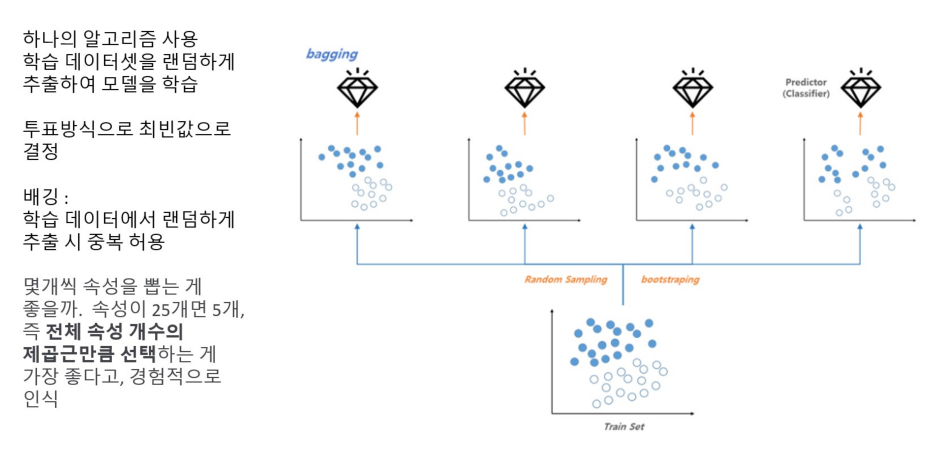

In [ ]:
# Loadthe images
img = mpimg.imread("/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/bagging.jpg")

# Plot the image
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off') # 축 제거
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


주요 하이퍼파라미터

n_estimators:
- 설명: 랜덤포레스트에 포함될 결정 트리의 개수를 지정합니다.
- 기본값: 100
- 영향: 트리의 개수가 많을수록 모델의 안정성과 성능이 향상될 수 있지만, 연산 비용도 증가합니다.

max_depth:
- 설명: 각 트리의 최대 깊이를 설정합니다.
- 기본값: None (리프 노드가 순수해질 때까지 또는 min_samples_split보다 적은 샘플을 가질 때까지 계속 분할)
- 영향: 깊이가 깊을수록 모델이 복잡해지고 과적합할 가능성이 커집니다.

min_samples_split:
- 설명: 내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
- 기본값: 2
- 영향: 큰 값은 과적합을 방지하는 데 도움이 됩니다.

min_samples_leaf:
- 설명: 리프 노드에 있어야 하는 최소 샘플 수입니다.
- 기본값: 1
- 영향: 큰 값은 과적합을 방지하고, 트리의 일반화 능력을 향상시킬 수 있습니다.

max_features:
- 설명: 각 분할에서 고려할 최대 특성 수입니다.
- 옵션: auto, sqrt, log2, 또는 정수 값
- 기본값: auto (모든 특성을 사용)
- 영향: 특성 수가 적을수록 모델의 다양성이 증가하지만, 너무 적으면 성능이 떨어질 수 있습니다.

Q. breast_cancer dataset으로 랜덤포레스트를 적용하여 모델링 및 평가를 아래의 하이퍼 파라미터를 이용하여 수행한 후 최적의 하이퍼파라미터를 구하세요.

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



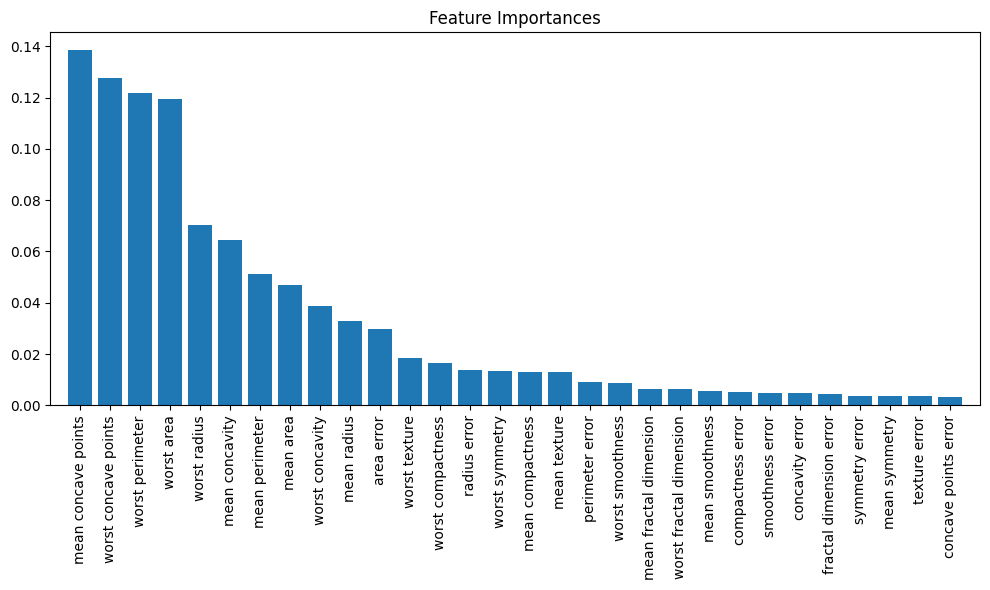

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 모델 생성
rf = RandomForestClassifier(random_state=42)

# GridSerchCV 설정
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,       # 교차 검증 횟수
                           n_jobs=-1,  # 모든 CPU 코어 사용
                           verbose=2)  # 0은 내역을 보여주지 않고, 1은 간단하게, 2는 상세하게 보여줌.

# 모델 훈련
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print(f'Best parameters found: {grid_search.best_params_}')

# 최적의 모델로 예측 수행
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# 중요 변수 시각화
feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names = cancer.feature_names
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Q. ROC AUC를 포함한 평가를 위한 사용자 함수를 적용하여 위 코드를 다시 작성하세요

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV)
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             classification_report,
                             confusion_matrix)



# 사용자 정의 함수
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"오차 행렬:\n{conf_matrix}")
    print(f"정확도: {accuracy:.4f}")
    print(f"정밀도: {precision:.4f}")
    print(f"재현율: {recall:.4f}")
    print(f"F1 스코어: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("분류 리포트:\n", class_report)


# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# cancer = load_breast_cancer()
# X = cancer.data
# y = cancer.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 모델 생성
rf = RandomForestClassifier(random_state=42)

# GridSerchCV 설정
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# 모델 훈련
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print(f'Best parameters found: {grid_search.best_params_}')

# 최적의 모델로 예측 수행
best_rf = grid_search.best_estimator_
train_and_evaluate(best_rf, X_train, X_test, y_train, y_test)

# 중요 변수 시각화
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = cancer.feature_names
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

## 로지스틱 회귀(Logistic Regression)

- 분류 문제를 해결하기 위한 알고리즘으로, 선형 회귀와 마찬가지로 입력 특성의 가중치 합을 계산하는데, 선형 회귀와 달리 결과를 이진 분류(0 또는 1, 참 또는 거짓 등)에 사용할 수 있는 확률로 변환.

- 로지스틱 회귀는 선형 회귀와 비슷하게 모델의 예측과 실제 값 사이의 차이를 최소화하도록 가중치를 학습. 하지만 로지스틱 회귀는 선형 회귀와는 달리 결과를 0과 1 사이의 값으로 제한하는 로지스틱 함수(또는 시그모이드 함수)를 사용.

- 로지스틱 회귀는 각 클래스에 속할 확률을 제공하며, 특정 임계값(일반적으로 0.5)을 초과하는 경우 데이터 포인트를 해당 클래스에 할당. 이는 이진 분류뿐만 아니라 다중 클래스 분류에도 적용될 수 있다(이 경우에는 일대다(OvR) 또는 다항 로지스틱 회귀를 사용할 수 있다).
  - 일대다(OvR): 각 클래스에 대해 개별 이진 분류기를 학습시키고, 가장 높은 확률을 제공하는 분류기의 클래스로 분류합니다.
  - 다항 로지스틱 회귀: 소프트맥스 함수를 사용하여 각 클래스에 대한 확률을 계산하고, 가장 높은 확률을 가지는 클래스로 분류합니다.
- 로지스틱 회귀는 출력이 확률이기 때문에, 결과의 해석이 직관적이며 모델의 예측이 불확실한 경우에도 그 정도를 측정할 수 있다. 또한 로지스틱 회귀는 선형 회귀보다 이상치에 덜 민감하며, 모델이 과적합되는 것을 방지하기 위해 규제를 적용할 수 있다는 장점도 있다.

- 로지스틱 함수, 또는 시그모이드 함수는 S-자 형태를 띠는 함수로, 실수 입력값을 0과 1 사이의 출력값으로 변환하는 데 사용. 이 함수는 머신러닝, 특히 이진 분류 문제에서 중요한 역할을 한다.

- 로지스틱 함수의 정의

    - f(x) = 1 / (1 + e^-x)

    - e는 자연 상수(약 2.71828). x는 어떤 실수 값도 가능하며, -무한대에서 무한대까지의 범위를 가지며 이 함수는 모든 실수 입력에 대해 0과 1 사이의 값을 반환.

    - 함수가 결과를 0과 1 사이로 제한하기 때문에, 이는 확률에 대해 논의할 때 특히 유용. 로지스틱 회귀 분석에서 이 함수는 선형 함수의 결과를 확률로 변환하는데 사용.

    - 입력값 x가 커질수록 로지스틱 함수의 출력은 1에 가까워지고, x가 작아질수록 출력은 0에 가까워진다. x가 0일 때 로지스틱 함수의 값은 0.5입니다. 이러한 특성 때문에 로지스틱 함수는 이진 분류 문제에 널리 사용.

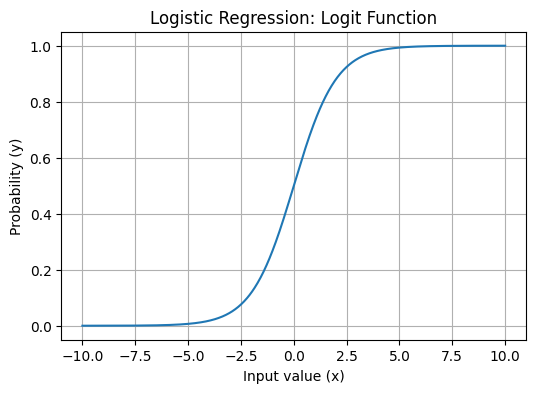

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 로그 함수 정의
def logit_function(x):
    return 1 / (1 + np.exp(-x))

# 입력 값 범위
x = np.linspace(-10, 10, 1000)

# 로짓 함수 적용
y = logit_function(x)

# 시각화
plt.figure(figsize=(6,4))
plt.plot(x, y)
plt.title("Logistic Regression: Logit Function")
plt.xlabel("Input value (x)")
plt.ylabel("Probability (y)")
plt.grid(True)
plt.show()

- max_iter=100:
로지스틱 회귀 모델이 데이터에 대해 수렴하지 않을 때, 반복 횟수를 늘려서 해결할 수 있습니다. 기본값은 100이지만, 필요한 경우 이 값을 늘릴 수 있습니다. 최적화 과정은 모델의 가중치를 업데이트하여 비용 함수를 점진적으로 최소화하는 과정입니다.
  - 초기화: 모델 파라미터(가중치와 절편)를 임의의 값으로 초기화합니다.
  - 예측: 현재 파라미터 값을 사용하여 훈련 데이터에 대한 예측을 수행합니다.
  - 오차 계산: 예측값과 실제값 사이의 오차를 계산합니다.
  - 비용 함수 계산: 현재 파라미터 값에 대한 비용 함수의 값을 계산합니다.
  - 기울기 계산: 비용 함수를 최소화하기 위해 필요한 기울기(그래디언트)를 계산합니다.
  - 파라미터 업데이트: 기울기를 사용하여 파라미터를 업데이트합니다.

- solver='lbfgs':
'lbfgs(Limited-memory Broyden-Fletcher-Goldfarb-Shanno)'는 대부분의 경우에 빠르고 안정적으로 수렴하는 알고리즘입니다. 특히, 큰 데이터셋과 많은 특성을 처리할 때 유용합니다. L-BFGS는 'Limited-memory'로, 메모리 사용을 최소화합니다. 이는 특히 고차원의 문제에서 중요합니다. 메모리 사용을 줄이기 위해 이전 단계의 기울기와 위치 정보만을 사용합니다.

- random_state=42:
모델의 학습 결과를 재현 가능하게 하기 위해 설정합니다. 이는 실험을 반복하고 결과를 비교할 때 유용합니다.

### 라소 회귀와 릿지 회귀

- 라소 회귀와 릿지 회귀는 로지스틱 회귀 모델에 정규화(regularization) 기법을 적용한 것으로, 모델의 과적합(overfitting)을 방지하고 일반화 성능을 향상시키기 위해 사용됩니다. L1 정규화와 L2 정규화는 각각 라소 회귀(Lasso Regression)와 릿지 회귀(Ridge Regression)로 불립니다.

#### 정규화의 필요성
- 정규화는 모델이 학습 데이터에 과적합되는 것을 방지하고, 새로운 데이터에 대한 예측 성능을 향상시키기 위해 모델의 복잡도를 조절하는 기법입니다. 특히, 다수의 특징(feature)이 있는 경우나 다중 공선성(multicollinearity)이 존재하는 경우에 유용합니다.

#### L1 정규화 (라소 회귀)
L1 정규화는 비용 함수에 가중치 절댓값의 합을 추가하여 가중치 값을 줄이는 방법입니다. 이는 특정 가중치를 0으로 만들어 자동으로 특징 선택(feature selection)을 수행하는 효과가 있습니다.

### 수식
라소 회귀의 비용 함수는 다음과 같습니다:

$\mathcal{L}(\beta) = \text{Loss}(\beta) + \lambda \sum_{j=1}^{n} |\beta_j|$


여기서 \(\lambda\)는 정규화 강도를 조절하는 하이퍼파라미터입니다.

### 장점
- 특징 선택 기능이 있어 불필요한 특징을 자동으로 제거합니다.
- 과적합을 방지하여 일반화 성능을 향상시킵니다.

### 단점
- 다중 공선성이 있는 데이터셋에서 가중치를 선택하는 방식이 불안정할 수 있습니다.

#### L2 정규화 (릿지 회귀)
L2 정규화는 비용 함수에 가중치 제곱합을 추가하여 가중치 값을 줄이는 방법입니다. 모든 가중치를 조금씩 감소시키며, 가중치를 0으로 만들지는 않습니다.

### 수식
릿지 회귀의 비용 함수는 다음과 같습니다:

$\mathcal{L}(\beta) = \text{Loss}(\beta) + \lambda \sum_{j=1}^{n} \beta_j^2$

여기서 \(\lambda\)는 정규화 강도를 조절하는 하이퍼파라미터입니다.

### 장점
- 다중 공선성이 있는 데이터셋에서 안정적인 성능을 보입니다.
- 과적합을 방지하여 일반화 성능을 향상시킵니다.

### 단점
- 모든 가중치가 조금씩 감소하므로 특징 선택 기능은 없습니다.


#### Elastic Net
Elastic Net은 L1 정규화와 L2 정규화를 결합한 방법으로, 라소 회귀와 릿지 회귀의 장점을 모두 취합니다. Elastic Net은 다음과 같은 비용 함수를 사용합니다:

$\mathcal{L}(\beta) = \text{Loss}(\beta) + \lambda_1 \sum_{j=1}^{n} |\beta_j| + \lambda_2 \sum_{j=1}^{n} \beta_j^2$

#### Solver의 역할
LogisticRegression에서 solver는 최적화 문제를 푸는 알고리즘을 의미합니다. 각 solver는 서로 다른 최적화 방법을 사용하여 모델의 가중치를 학습합니다. 주요 솔버와 그 역할은 다음과 같습니다:

- liblinear:
    - 작은 데이터셋에 적합합니다.
    - l1 및 l2 페널티를 모두 지원합니다.
    - 원-대-다(One-vs-Rest) 방식을 사용하여 다중 클래스 분류를 수행합니다.
- lbfgs:
    - L-BFGS(Limited-memory Broyden-Fletcher-Goldfarb-Shanno) 최적화 알고리즘을 사용합니다.
    - l2 페널티와 none 페널티만 지원합니다.
    - 대규모 데이터셋과 다중 클래스 분류에 적합합니다.
- sag:
    - Stochastic Average Gradient Descent 방법을 사용합니다.
    - l2 페널티와 none 페널티만 지원합니다.
    - 대규모 데이터셋에 적합합니다.
    - 부분적으로 수렴이 빨라서 대규모 데이터셋에 적합합니다.
- saga:
    - sag의 확장판으로, l1, l2, elasticnet 페널티를 모두 지원합니다.
    - 대규모 데이터셋에 적합합니다.
    - 여러 페널티와 결합할 수 있습니다.

In [ ]:
# 로지스틱 회귀
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# StandardScaler( )로 평균이 0, 표준편차 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
lr_clf = LogisticRegression(max_iter=100, solver='lbfgs', random_state=42)
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print(f'accuracy: {accuracy_score(y_test, lr_preds):.3f}')

accuracy: 0.977


In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')

param_grid = {'penalty':['l2','l1'],
              'C':[0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=param_grid, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print(f'최적 하이퍼 파라미터: {grid_clf.best_params_}, 최적 평균 정확도: {grid_clf.best_score_:.3f}')

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도: 0.975


In [ ]:
best_grid_clf = grid_clf.best_estimator_        # best_params 적용
pred_y = best_grid_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred_y)
print(f"Accuracy: {accuracy:.4f}")
# print(f'accuracy: {accuracy_score(y_test, best_grid_preds):.3f}')

Accuracy: 0.9883


### One-vs-Rest (OvR)와 One-vs-One (OvO)의 차이점

One-vs-Rest (OvR)와 One-vs-One (OvO)은 다중 클래스 분류 문제를 해결하기 위한 전략

#### **One-vs-Rest (OvR)**

One-vs-Rest (OvR), 또는 One-vs-All (OvA) 전략은 다음과 같은 방식으로 작동:

- 다중 클래스 분류 문제를 이진 분류 문제로 변환.
- 각 클래스에 대해 해당 클래스를 나머지 모든 클래스와 구분하는 이진 분류기를 학습.
- 최종 예측은 각 이진 분류기의 출력 확률을 기반으로 가장 높은 확률을 가진 클래스로 결정.

##### 예시
다음과 같은 세 개의 클래스 (A, B, C)가 있는 경우:
1. A vs (B, C)
2. B vs (A, C)
3. C vs (A, B)

각각의 이진 분류기를 학습한 후, 새로운 데이터 포인트가 주어지면 각 분류기의 출력 확률을 비교하여 가장 높은 확률을 가진 클래스를 선택.

#### One-vs-One (OvO)

One-vs-One (OvO) 전략은 다음과 같은 방식으로 작동:

- 각 클래스 쌍에 대해 이진 분류기를 학습.
- 총 $\frac{n(n-1)}{2}$ 개의 이진 분류기를 학습 (n은 클래스의 개수).
- 각 이진 분류기는 두 클래스 간의 구분을 학습.
- 최종 예측은 다수결 투표를 통해 결정.

##### 예시
다음과 같은 세 개의 클래스 (A, B, C)가 있는 경우:
1. A vs B
2. A vs C
3. B vs C

새로운 데이터 포인트가 주어지면 각 이진 분류기의 예측을 기반으로 다수결 투표를 통해 최종 클래스를 결정.

#### 차이점 요약

| Feature                    | One-vs-Rest (OvR)                      | One-vs-One (OvO)                  |
|----------------------------|----------------------------------------|-----------------------------------|
| 분류기 수                    | 클래스 수 (n)                            | \(\frac{n(n-1)}{2}\)                   |
| 분류기 당 데이터 양            | 전체 데이터셋                            | 두 클래스 간의 데이터만 사용          |
| 예측 방식                    | 가장 높은 확률의 클래스를 선택             | 다수결 투표로 최종 클래스를 결정      |
| 계산 비용                    | 상대적으로 낮음                           | 상대적으로 높음                      |
| 구현의 복잡성                | 낮음                                     | 높음                                 |

#### Logistic Regression과 OvR, OvO

`LogisticRegression` 모델에서 `multi_class` 파라미터를 설정하여 OvR 또는 OvO 전략을 사용할 수 있음:

- `multi_class='ovr'`: One-vs-Rest (기본값)
- `multi_class='multinomial'`와 `solver='lbfgs'` 또는 `solver='saga'`: 소프트맥스를 사용한 다중 클래스 분류 (OvO와 유사하지만 완전히 동일하지는 않음)

---

#### One-vs-Rest (OvR)와 One-vs-One (OvO) 전략의 장점과 단점

#### One-vs-Rest (OvR)

**장점:**
- **구현 용이성**: 비교적 구현이 간단하고 직관적. 각 클래스에 대해 이진 분류기를 학습하기 때문에 코드가 간결하고 이해하기 쉬움.
- **계산 비용 절감**: 이진 분류기의 수가 클래스의 수와 동일하므로 다수결 투표 방식에 비해 계산 비용이 상대적으로 낮음.
- **효율성**: 큰 데이터셋에서 각 클래스가 나머지 모든 클래스를 구분하는 방식이기 때문에 대규모 데이터셋에 대해 비교적 효율적으로 동작할 수 있음.

**단점:**
- **불균형 데이터**: 각 이진 분류기는 클래스의 불균형 문제를 가질 수 있음. 특히, 클래스 간의 데이터 분포가 크게 다를 경우 성능이 저하될 수 있음.
- **경계 문제**: 각 이진 분류기가 독립적으로 학습되기 때문에, 클래스 간의 경계가 명확하지 않을 수 있음. 즉, 서로 가까운 클래스 간의 구분이 어려울 수 있음.

#### One-vs-One (OvO)

**장점:**
- **정밀한 구분**: 각 이진 분류기가 두 클래스 간의 구분을 학습하기 때문에, 클래스 간의 경계를 보다 세밀하게 학습할 수 있음.
- **성능**: 각 클래스 쌍에 대해 개별적으로 학습되기 때문에, 특히 클래스 간의 차이가 미세할 때 더 나은 성능을 보일 수 있음.

**단점:**
- **계산 비용**: 이진 분류기의 수가 클래스 쌍의 수에 따라 급격히 증가. 따라서, 클래스 수가 많을 경우 계산 비용과 메모리 사용량이 크게 증가할 수 있음.
- **복잡성**: 다수결 투표 방식과 같은 추가적인 단계가 필요하여 구현이 더 복잡하고, 모델의 해석이 어려울 수 있음.

#### **One-vs-Rest (OvR) 사용 시의 고려사항**
- 데이터의 균일성:

  - **균일한 데이터**: 데이터가 균일하게 분포되어 있다면, OvR 방식도 충분히 좋은 성능을 발휘할 수 있음. 각 이진 분류기는 클래스를 나머지 모든 클래스와 구분하는 방식으로 작동하기 때문에, 데이터 분포가 균일하면 각 이진 분류기에서 잘 학습될 가능성이 높음.
- 클래스 간의 차이:

  - **미세한 차이**: 클래스 간의 차이가 미세한 경우, OvR 방식이 모든 클래스와의 경계를 독립적으로 학습하기 때문에 OvO 방식보다 성능이 떨어질 수 있음. OvO 방식은 클래스 간의 경계를 더 세밀하게 학습할 수 있어 미세한 차이를 더 잘 포착할 수 있음.
- 계산 복잡도:

  - **저렴한 계산 비용**: OvR 방식은 클래스 수 만큼의 이진 분류기를 사용하므로, 계산 비용이 상대적으로 낮음. OvO 방식은 클래스 쌍의 수에 비례하여 이진 분류기가 증가하므로, 클래스 수가 많을 경우 계산 비용이 크게 증가할 수 있음.
- 모델 해석:

  - **단순한 해석**: OvR 방식은 각 이진 분류기가 독립적으로 학습되기 때문에 모델의 해석이 더 간단할 수 있음. OvO 방식은 다수결 투표와 같은 추가적인 과정이 필요하기 때문에 해석이 복잡할 수 있음.

### **요약**
- **데이터 균일**: 데이터가 균일하게 분포되어 있다면 OvR 방식이 효과적일 수 있으며, 특별히 문제가 되지는 않음.
- **클래스 간 경계**: 클래스 간의 차이가 미세하다면 OvO 방식이 더 효과적일 수 있음.
- **계산 복잡도**: OvR 방식이 계산 비용이 낮기 때문에 큰 데이터셋에서 유리할 수 있음.
- **모델 해석**: OvR 방식이 더 직관적이고 해석이 쉬울 수 있음.